# Metodo Para encontrar la recta tangente

* Debo encontrar la ecuanción de la recta tangente a $f(x) = ax^2+bx +c$, (el ajuste polinomial), tal que pasa por $(0, CDT)$

$$y-cdt = f^\prime(x_0)\cdot x = (2ax_0+b)\cdot x $$
$$y-f(x_0) = (2ax_0+b)\cdot (x-x_0)$$ 
Restando ambas ecuaciones se tiene que 

$$x_0 = \sqrt{\frac{c -cdt}{a}} $$

In [6]:
import seaborn as sns

Los parametros para divercificar el portafolio es: 
 [0.1535 0.2557 0.2434 0.3474]


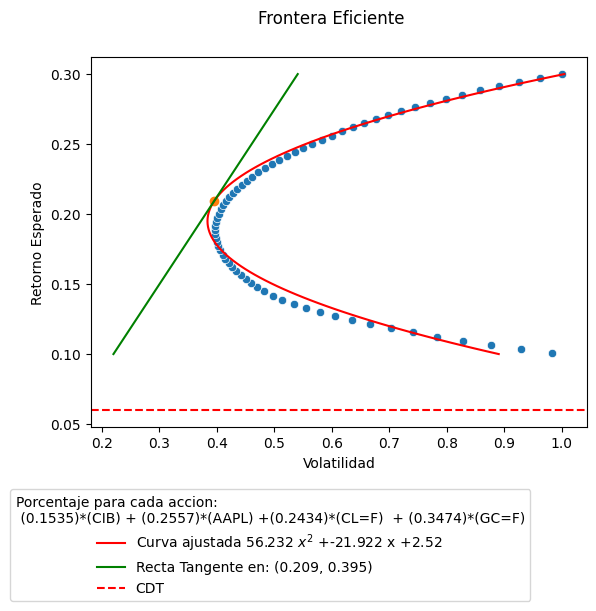

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decouple import config
from portafolioOptimo import MiPortafolio

pathData = config('PATHDATA')


a = 56.23220629
b = -21.92196959
c = 2.5204357
cdt= 0.06



data = pd.read_csv(pathData + '/portafolio1.csv')

def f(x, a, b, c,):
    return a*(x**2) + b*x + c

def rectaTan(x,xo,a,b,cdt):
  return (2*a*xo+b)*x + cdt

##### Obtener los parametros de punto tangente
r = np.array([0.2,0.1,0.2,0.3])  ## vector de retornos esperados que no se como calcular
Nombre_Acciones = ['CIB','AAPL','CL=F','GC=F']
xo= np.sqrt((c-cdt)/a)
yo= f(xo,a,b,c)

pts = MiPortafolio(xo,r,Nombre_Acciones).parametros()

# Generar un rango de valores de retorno esperado
rango = np.linspace(0.1, 0.3, 100)

  ## Ajuste cuadratico  
plt.plot(f(rango,a,b,c),rango, 'r-', label=f'Curva ajustada {round(a,3)} $x^2$ +{round(b,3)} x +{round(c,3)} ')
sns.scatterplot(data= data ,x='varianza',y='Retorno')
plt.scatter(yo,xo)
plt.plot(rectaTan(rango,xo,a,b,cdt),rango, 'g-', label=f'Recta Tangente en: {xo.round(3),yo.round(3) }')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno Esperado')
plt.suptitle('Frontera Eficiente')

plt.axhline(y=0.06, color='r', linestyle='--',label='CDT')
plt.legend(bbox_to_anchor=(0.9, -0.15),fontsize='medium', title= f'Porcentaje para cada accion: \n ({pts[0]})*({Nombre_Acciones[0]}) + ({pts[1]})*({Nombre_Acciones[1]}) +({pts[2]})*({Nombre_Acciones[2]})  + ({pts[3]})*({Nombre_Acciones[3]})')
plt.show()